In [3]:
#Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

#Read the files
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)

#Combine Data into single Dataset
combined_df = pd.merge(clinical_df, mouse_df, how = 'inner', on = 'Mouse ID')

#Display

combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [10]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
group_df = combined_df.groupby(['Drug', 'Timepoint'])
mean_tumor = group_df.mean()['Tumor Volume (mm3)']

# Convert to DataFrame
mean_tumor_df = pd.DataFrame(mean_tumor)

#Preview DataFrame
mean_tumor_df = mean_tumor_df.reset_index()
mean_tumor_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [13]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_volume_se = group_df.sem()['Tumor Volume (mm3)']

# Convert to DataFrame
tumor_volume_df = pd.DataFrame(tumor_volume_se)

# Preview DataFrame
tumor_volume_df = tumor_volume_df.reset_index()
tumor_volume_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [14]:
# Minor Data Munging to Re-Format the Data Frames
reformat_df = mean_tumor_df.pivot(index = 'Timepoint', columns = 'Drug', values = 'Tumor Volume (mm3)')

# Preview that Reformatting worked
reformat_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


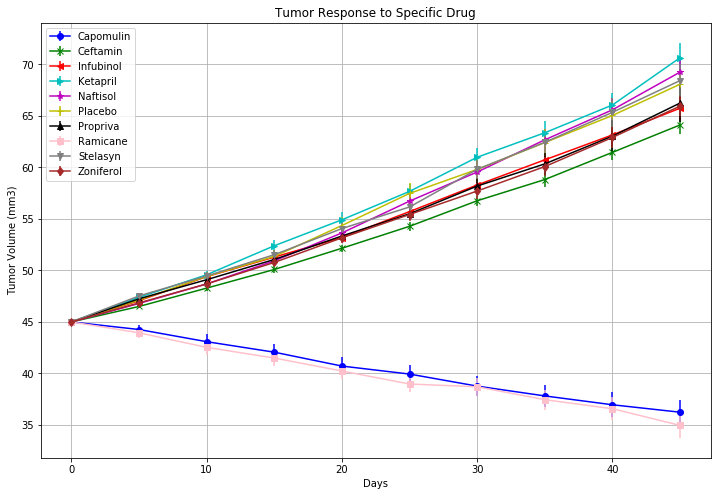

In [41]:
# Generate the Plot (with Error Bars)
fix, ax = plt.subplots(figsize = (12,8))
x_axis = reformat_df.index.values
markers = ['o', 'x', '<', '>', '*', '+', '^', 's', 'v', 'd',]
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'pink', 'gray', 'brown']

x = 0
for drug in reformat_df.columns:
    y_axis = reformat_df[drug].values
    std_error = tumor_volume_df[tumor_volume_df.Drug == drug]['Tumor Volume (mm3)'].values
    ax.errorbar(x_axis, y_axis, std_error, label = drug, linestyle = 'solid', marker = markers[x], color = colors[x])
    x += 1

plt.title('Tumor Response to Specific Drug')
plt.xlabel('Days')
plt.ylabel('Tumor Volume (mm3)')
plt.legend(loc = 'best')
plt.grid()
# Save the Figure
plt.savefig('plots/Tumor_Response_graph')

In [24]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_response = group_df.mean()['Metastatic Sites']
# Convert to DataFrame
meta_response_df = pd.DataFrame(meta_response)
# Preview DataFrame
meta_response_df = meta_response_df.reset_index()
meta_response_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [25]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
se_meta_response = group_df.sem()['Metastatic Sites']
# Convert to DataFrame
se_meta_response_df = pd.DataFrame(se_meta_response)
# Preview DataFrame
se_meta_response_df = se_meta_response_df.reset_index()
se_meta_response_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [26]:
# Minor Data Munging to Re-Format the Data Frames
meta_response_reformat_df = meta_response_df.pivot(index = 'Timepoint', columns = 'Drug', values = 'Metastatic Sites')
# Preview that Reformatting worked
meta_response_reformat_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


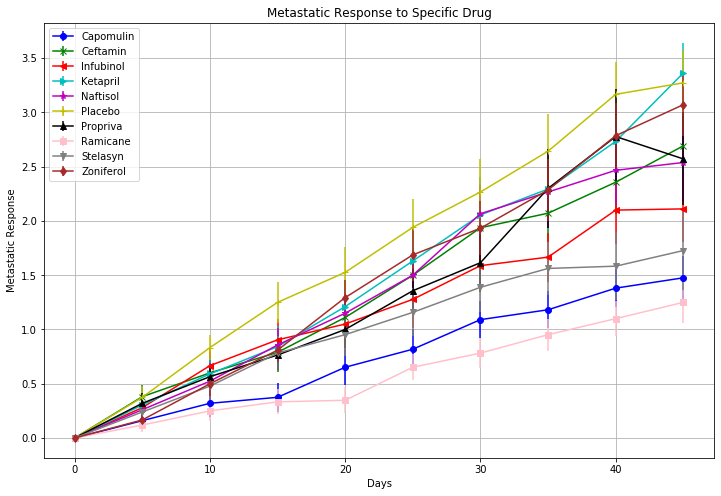

In [40]:
#PLOT TIME
fix, ax = plt.subplots(figsize = (12,8))
x_axis = meta_response_reformat_df.index.values
markers = ['o', 'x', '<', '>', '*', '+', '^', 's', 'v', 'd',]
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'pink', 'gray', 'brown']

x = 0
for drug in meta_response_reformat_df:
    y_axis = meta_response_reformat_df[drug].values
    std_error = se_meta_response_df[se_meta_response_df.Drug == drug]['Metastatic Sites'].values
    ax.errorbar(x_axis, y_axis, std_error, label = drug, linestyle = 'solid', marker = markers[x], color = colors[x])
    x += 1

plt.title('Metastatic Response to Specific Drug')
plt.xlabel('Days')
plt.ylabel('Metastatic Response')
plt.legend(loc = 'best')
plt.grid()
# Save the Figure
plt.savefig('plots/Metastatic_response_graph')

In [30]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = group_df.count()['Mouse ID']
# Convert to DataFrame
mice_count_df = pd.DataFrame(mice_count)
# Preview DataFrame
mice_count_df = mice_count_df.reset_index()
mice_count_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [32]:
 # Minor Data Munging to Re-Format the Data Frames
mice_count_reformat = mice_count_df.pivot(index = 'Timepoint', columns = 'Drug', values = 'Mouse ID')
# Preview the Data Frame
mice_count_reformat.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


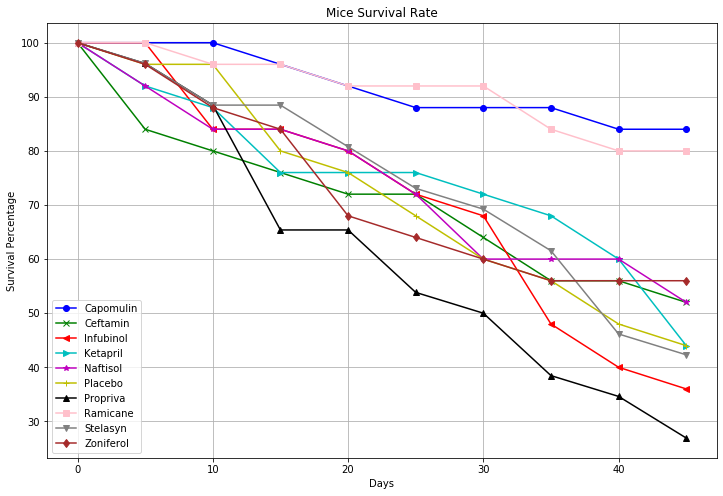

In [39]:
#PLOT IT UP BABYY
fix, ax = plt.subplots(figsize = (12,8))
x_axis = mice_count_reformat.index.values
markers = ['o', 'x', '<', '>', '*', '+', '^', 's', 'v', 'd',]
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'pink', 'gray', 'brown']

x = 0
for drug in mice_count_reformat.columns:
    micecount = mice_count_reformat[drug].values[0]
    y_axis = mice_count_reformat[drug].values / micecount * 100
    plt.plot(x_axis, y_axis, marker = markers[x], color = colors[x], label = drug)
    x += 1

plt.title('Mice Survival Rate')
plt.xlabel('Days')
plt.ylabel('Survival Percentage')
plt.legend(loc = 'best')
plt.grid()
# Save the Figure
plt.savefig('plots/mice_survival_rate')

In [38]:
 # Calculate the percent changes for each drug
percent_tumor_df = mean_tumor_df.drop(['Timepoint'], axis = 1)
group_drug_df = percent_tumor_df.groupby(['Drug'])
percentchange = (group_drug_df['Tumor Volume (mm3)'].last() - group_drug_df['Tumor Volume (mm3)'].first()) / group_drug_df['Tumor Volume (mm3)'].first() * 100
# Display the data to confirm
percentchange

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
Name: Tumor Volume (mm3), dtype: float64

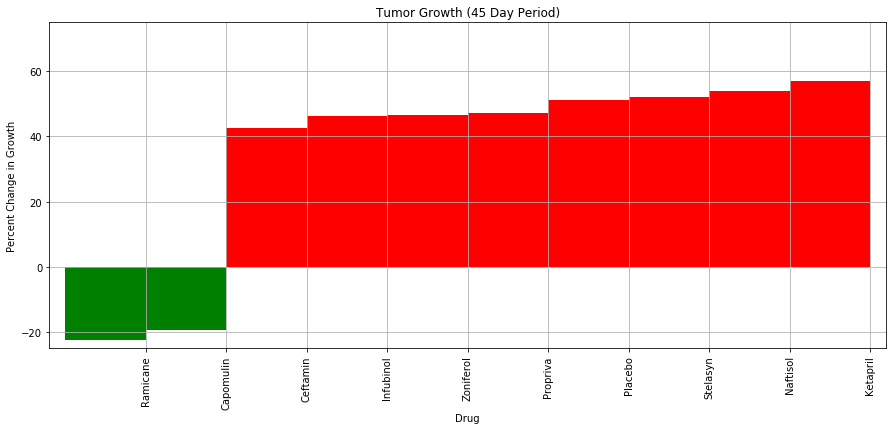

In [56]:
# Store all Relevant Percent Changes into a Tuple
percentchange = percentchange.sort_values()

# Splice the data between passing and failing drugs
failingdrug = percentchange[percentchange < 0].sort_values()
passingdrug = percentchange.copy()
passingdrug.loc[passingdrug.values < 0] = 0
passingdrug = passingdrug.sort_values()

# Orient widths. Add labels, tick marks, etc. 
x_axis = np.arange(len(percentchange))
ticks = [value + 0.5 for value in x_axis]
plt.figure(figsize=(15,6))

# Use functions to label the percentages of changes
ax = failingdrug.plot(kind = 'bar', color = 'g', width = 1)
passingdrug.plot(kind = 'bar', color = 'r', width = 1, ax=ax)
plt.xticks(ticks, percentchange.index)

# Call functions to implement the function calls
plt.title('Tumor Growth (45 Day Period)')
plt.ylabel("Percent Change in Growth")
plt.xlim(-0.7,len(percentchange)-0.3)
plt.ylim(-25,75)
plt.grid()

# Save the Figure
plt.savefig("plots/Tumor_Growth_bar_chart")

# Show the Figure